In [1]:
# Importing the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Importing the dataset

In [4]:
comp = pd.read_csv("D:\Data science\Assignments docs\Multi linear Regression\Computer_Data.csv")
comp.head()

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1


In [5]:
# Removing the first unwanted column

In [6]:
comp = comp.drop(comp.columns[[0]], axis=1)
comp.head(10)

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1
5,3695,66,340,16,14,no,no,yes,94,1
6,1720,25,170,4,14,yes,no,yes,94,1
7,1995,50,85,2,14,no,no,yes,94,1
8,2225,50,210,8,14,no,no,yes,94,1
9,2575,50,210,4,15,no,no,yes,94,1


In [7]:
comp.shape

(6259, 10)

In [8]:
# Correlation matrix

In [9]:
comp.corr()

,price,speed,hd,ram,screen,ads,trend
price,1.000000,0.300976,0.430258,0.622748,0.296041,0.054540,-0.199987
speed,0.300976,1.000000,0.372304,0.234760,0.189074,-0.215232,0.405438
hd,0.430258,0.372304,1.000000,0.777726,0.232802,-0.323222,0.577790
ram,0.622748,0.234760,0.777726,1.000000,0.208954,-0.181670,0.276844
screen,0.296041,0.189074,0.232802,0.208954,1.000000,-0.093919,0.188614
ads,0.054540,-0.215232,-0.323222,-0.181670,-0.093919,1.000000,-0.318553
trend,-0.199987,0.405438,0.577790,0.276844,0.188614,-0.318553,1.000000


In [10]:
# There exists some collinearity between input variables especially between ram and hd

In [11]:
import seaborn as sns

In [12]:
# Scatter plot between the variables along with histograms

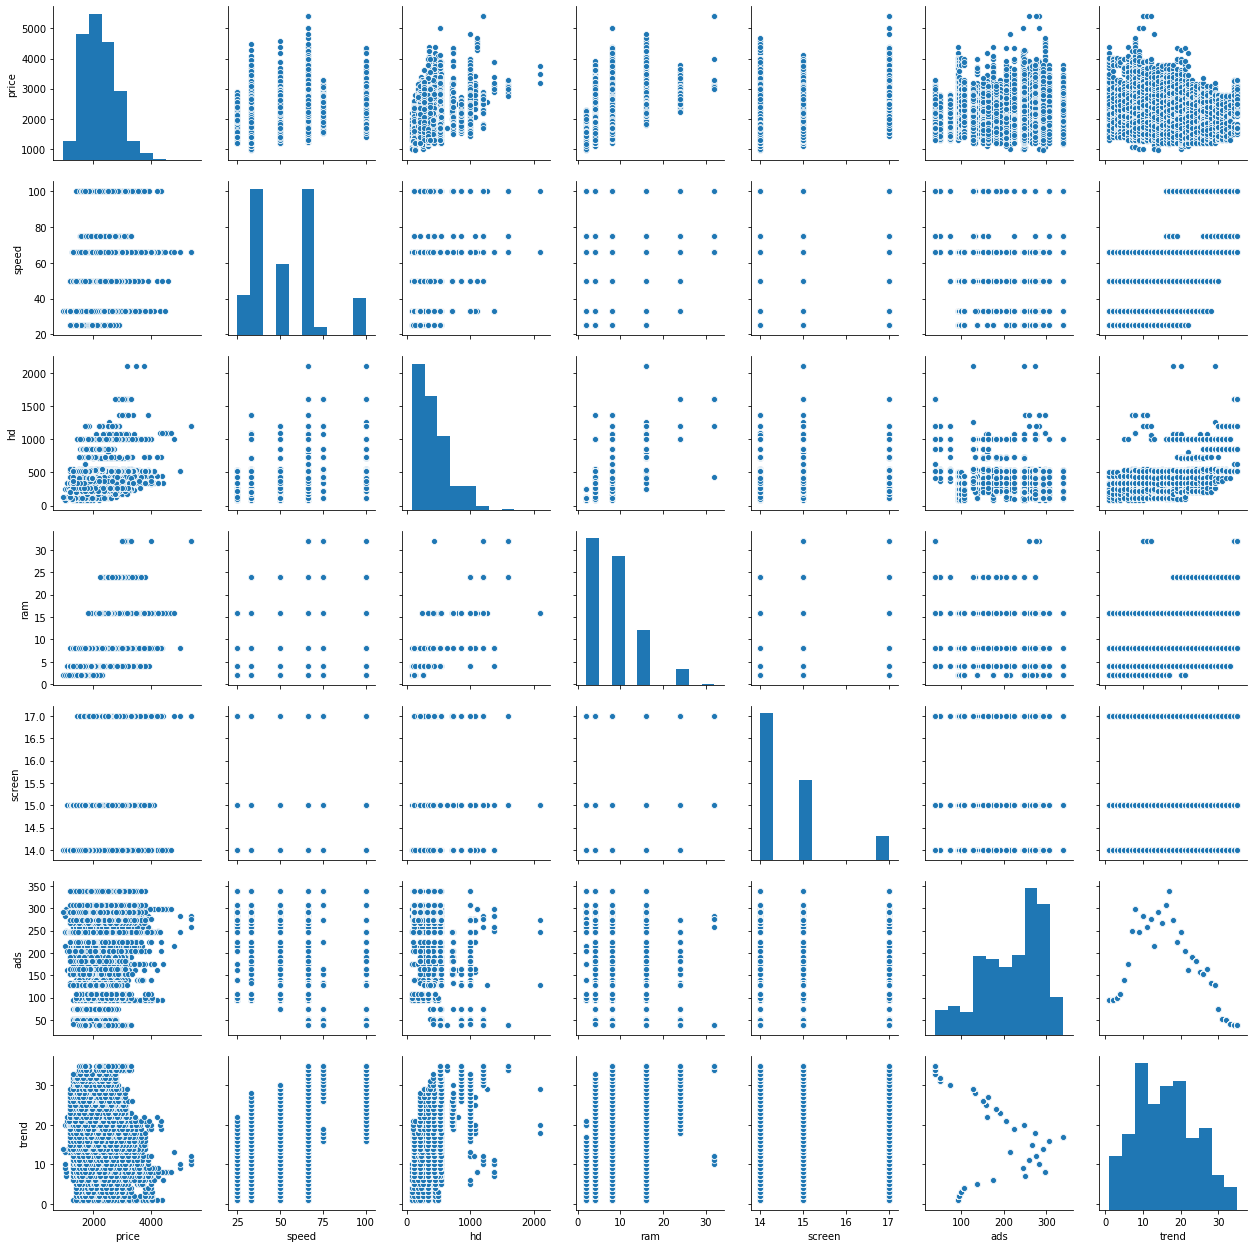

In [13]:
sns.pairplot(comp)

In [14]:
comp.columns            # column names

Index(['price', 'speed', 'hd', 'ram', 'screen', 'cd', 'multi', 'premium',
       'ads', 'trend'],
      dtype='object')

In [15]:
import statsmodels.formula.api as smf

In [16]:
# preparing model considering all the variables 

In [17]:
ml1 = smf.ols("price~speed+hd+ram+screen+ads+trend", data=comp).fit()
ml1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     2580.
Date:                Thu, 13 Aug 2020   Prob (F-statistic):               0.00
Time:                        00:08:22   Log-Likelihood:                -44817.
No. Observations:                6259   AIC:                         8.965e+04
Df Residuals:                    6252   BIC:                         8.969e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -246.6755     66.371     -3.717      0.000    -376.785    -116.566
speed          8.8939      0.209     42.590      0.000       8.485       9.303
hd             0.7088      0.031     22.932      0.000       0.648       0.769
ram           47.3870      1.188     39.899      0.000      45.059      49.715
screen       126.7024      4.521     28.022      0.000     117.839     135.566
ads            0.9697      0.057     17.099      0.000       0.859       1.081
trend        -47.0820      0.676    -69.660      0.000     -48.407     -45.757
==============================================================================
Omnibus:                     1407.073   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3902.981
Skew:                           1.187   Prob(JB):                         0.00
Kurtosis:                       6.054   Cond. No.                     8.89e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
# all the coefficients has p_values significant

In [19]:
ml1.params          # Getting coefficients of variables

Intercept   -246.675468
speed          8.893913
hd             0.708823
ram           47.387036
screen       126.702402
ads            0.969689
trend        -47.081967
dtype: float64

In [20]:
import statsmodels.api as sm

In [21]:
# Checking whether data has any influential values 

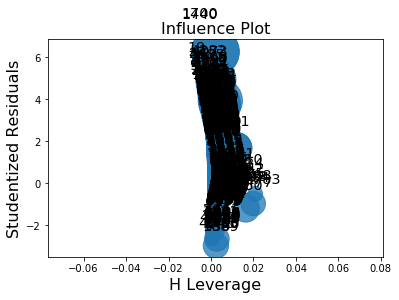

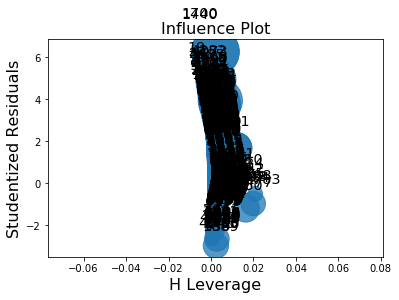

In [22]:
sm.graphics.influence_plot(ml1)

In [23]:
# index 1440 AND 1700 is showing high influence so we can exclude that entire row

In [24]:
comp_new = comp.drop(comp.index[[1440,1700]], axis=0)
comp_new.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1


In [25]:
comp_new.shape

(6257, 10)

In [26]:
# Preparing new model 

In [27]:
ml_new = smf.ols("price~speed+hd+ram+screen+ads+trend", data=comp_new).fit()
ml_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     2598.
Date:                Thu, 13 Aug 2020   Prob (F-statistic):               0.00
Time:                        00:08:51   Log-Likelihood:                -44764.
No. Observations:                6257   AIC:                         8.954e+04
Df Residuals:                    6250   BIC:                         8.959e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -218.5272     66.041     -3.309      0.001    -347.991     -89.064
speed          8.8723      0.208     42.745      0.000       8.465       9.279
hd             0.7018      0.031     22.837      0.000       0.642       0.762
ram           47.6375      1.181     40.345      0.000      45.323      49.952
screen       124.7493      4.499     27.727      0.000     115.929     133.569
ads            0.9635      0.056     17.092      0.000       0.853       1.074
trend        -46.8866      0.672    -69.760      0.000     -48.204     -45.569
==============================================================================
Omnibus:                     1315.783   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3344.720
Skew:                           1.145   Prob(JB):                         0.00
Kurtosis:                       5.754   Cond. No.                     8.90e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
ml_new.params                 # Getting coefficients of variables

Intercept   -218.527175
speed          8.872302
hd             0.701798
ram           47.637544
screen       124.749321
ads            0.963465
trend        -46.886568
dtype: float64

In [29]:
print(ml_new.conf_int(0.05))       # for 95% confidence interval

                    0           1
Intercept -347.990642  -89.063707
speed        8.465403    9.279201
hd           0.641554    0.762042
ram         45.322870   49.952218
screen     115.929365  133.569277
ads          0.852961    1.073970
trend      -48.204131  -45.569004


In [30]:
# predicting the price values using the new model

In [31]:
pred = ml_new.predict(comp_new)
pred.head()

0    2040.144044
1    2019.356361
2    2228.055162
3    2293.856017
4    2865.240403
dtype: float64

In [32]:
# calculating VIF's values of independent variables

In [33]:
rsq_sp = smf.ols("speed~hd+ram+screen+ads+trend",data=comp_new).fit().rsquared

In [34]:
vif_sp= 1/(1-rsq_sp)
vif_sp

1.257591834093469

In [35]:
rsq_hd = smf.ols("hd~speed+ram+screen+ads+trend",data=comp_new).fit().rsquared

In [36]:
vif_hd= 1/(1-rsq_hd)
vif_hd

4.116929665956306

In [37]:
rsq_rm = smf.ols("ram~hd+speed+screen+ads+trend",data=comp_new).fit().rsquared

In [38]:
vif_rm= 1/(1-rsq_rm)
vif_rm

2.883061250379095

In [39]:
rsq_sc = smf.ols("screen~ram+hd+speed+ads+trend",data=comp_new).fit().rsquared

In [40]:
vif_sc= 1/(1-rsq_sc)
vif_sc

1.0790921370933575

In [41]:
rsq_ad = smf.ols("ads~screen+ram+hd+speed+trend",data=comp_new).fit().rsquared

In [42]:
vif_ad= 1/(1-rsq_ad)
vif_ad

1.1603970253355265

In [43]:
rsq_tr = smf.ols("trend~screen+ram+hd+speed+ads",data=comp_new).fit().rsquared

In [44]:
vif_tr= 1/(1-rsq_tr)
vif_tr

1.8261105507393494

In [45]:
# Storing vif values in a data frame

In [46]:
d1= {"Variables":["Speed","HD","RAM","Screen","Ads","Trend"], "VIF":[vif_sp,vif_hd,vif_rm,vif_sc,vif_ad,vif_tr]}

In [47]:
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,Speed,1.257592
1,HD,4.116930
2,RAM,2.883061
3,Screen,1.079092
4,Ads,1.160397
5,Trend,1.826111


In [48]:
# all the variables has low VIF values

In [49]:
# Added varible plot 

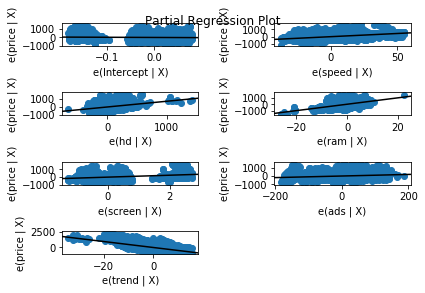

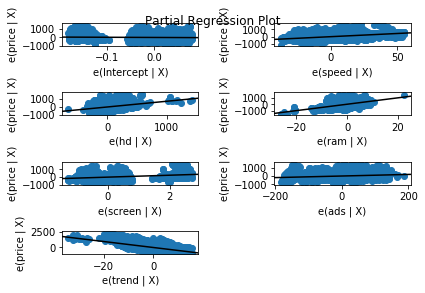

In [50]:
sm.graphics.plot_partregress_grid(ml_new)

In [51]:
# added varible plots of all the variables are significant, hence all the variables are considered

In [52]:
# final model

In [53]:
final_ml = smf.ols("price~speed+hd+ram+ads+screen+trend", data=comp_new).fit()
final_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     2598.
Date:                Thu, 13 Aug 2020   Prob (F-statistic):               0.00
Time:                        00:08:57   Log-Likelihood:                -44764.
No. Observations:                6257   AIC:                         8.954e+04
Df Residuals:                    6250   BIC:                         8.959e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -218.5272     66.041     -3.309      0.001    -347.991     -89.064
speed          8.8723      0.208     42.745      0.000       8.465       9.279
hd             0.7018      0.031     22.837      0.000       0.642       0.762
ram           47.6375      1.181     40.345      0.000      45.323      49.952
ads            0.9635      0.056     17.092      0.000       0.853       1.074
screen       124.7493      4.499     27.727      0.000     115.929     133.569
trend        -46.8866      0.672    -69.760      0.000     -48.204     -45.569
==============================================================================
Omnibus:                     1315.783   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3344.720
Skew:                           1.145   Prob(JB):                         0.00
Kurtosis:                       5.754   Cond. No.                     8.90e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
final_ml.params      # Getting coefficients of variables

Intercept   -218.527175
speed          8.872302
hd             0.701798
ram           47.637544
ads            0.963465
screen       124.749321
trend        -46.886568
dtype: float64

In [55]:
final_pred = final_ml.predict(comp_new)   # Predicted values
final_pred

0       2040.144044
1       2019.356361
2       2228.055162
3       2293.856017
4       2865.240403
           ...     
6254    1688.137692
6255    1993.558647
6256    2921.946481
6257    2295.216918
6258    2544.715560
Length: 6257, dtype: float64

In [56]:
final_pred.corr(comp_new.price)

0.8448707563959572

In [57]:
# added variable plot for the final model

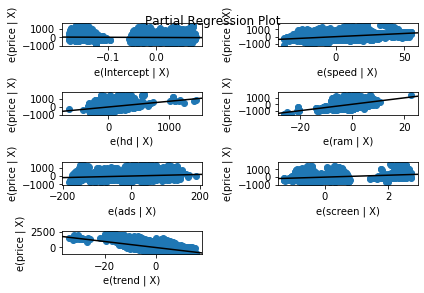

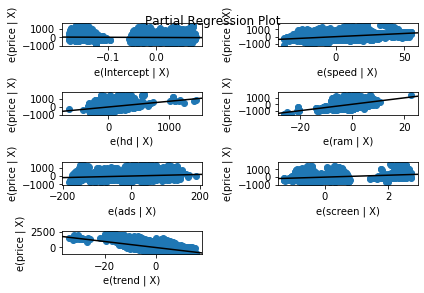

In [58]:
sm.graphics.plot_partregress_grid(final_ml)

Text(0, 0.5, 'fitted values')

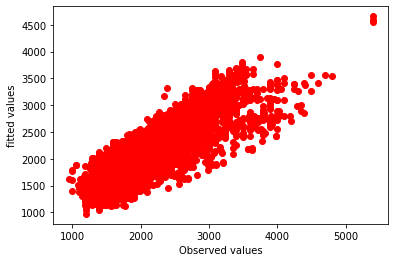

In [59]:
plt.scatter(comp_new.price, pred, c="r");plt.xlabel("Observed values");plt.ylabel("fitted values")
# Plot showing Observed values VS Fitted values

Text(0, 0.5, 'standard residuals')

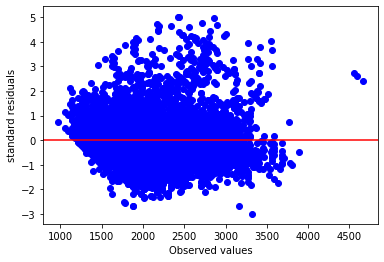

In [60]:
plt.scatter(pred, ml_new.resid_pearson, c="b");plt.axhline(y=0,c="r");plt.xlabel("Observed values");plt.ylabel("standard residuals")
# PLot showing Residuals VS Fitted Values

(array([  18.,  310., 1332., 2454., 1428.,  393.,  162.,   99.,   45.,
          16.]),
 array([-2.98769244, -2.18582534, -1.38395823, -0.58209113,  0.21977597,
         1.02164307,  1.82351018,  2.62537728,  3.42724438,  4.22911148,
         5.03097859]),
 <a list of 10 Patch objects>)

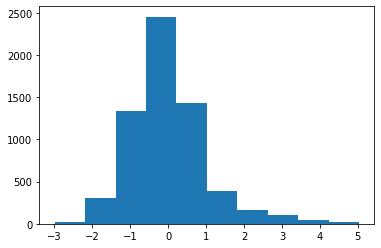

In [61]:
plt.hist(ml_new.resid_pearson)          # histogram of standardized residuals

In [62]:
import pylab 
import scipy.stats as st

In [63]:
# QQ plot for residuals 

((array([-3.69308873, -3.46120342, -3.33357042, ...,  3.33357042,
          3.46120342,  3.69308873]),
  array([-2.98769244, -2.69614289, -2.69509942, ...,  4.96970325,
          5.00552848,  5.03097859])),
 (0.9673218830312442, 1.453563531681202e-14, 0.9673353459782867))

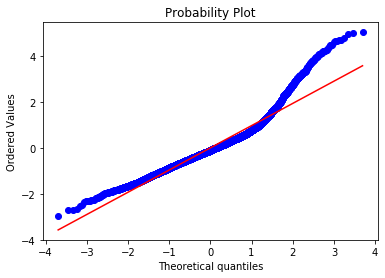

In [64]:
st.probplot(ml_new.resid_pearson, dist="norm", plot =pylab)

In [65]:
# Looking at the QQ-plot and scatter plot, the final model performs well with high R_square value and significant p-values

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
# Splitting the data into train and test data 

In [68]:
comp_train, comp_test = train_test_split(comp_new, test_size=0.2)

In [69]:
comp_train.shape

(5005, 10)

In [70]:
comp_train.head(5)

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
515,2935,50,250,8,17,no,no,yes,139,5
3339,3239,66,424,8,15,no,no,no,307,16
450,1395,25,107,2,14,no,no,yes,139,5
5998,1829,66,420,8,14,no,no,no,75,30
3692,1490,25,214,4,14,no,no,yes,339,17


In [71]:
# preparing the model on train data 

In [72]:
model_train=smf.ols("price~speed+hd+ram+screen+trend", data=comp_train).fit()

In [73]:
train_pred = model_train.predict(comp_train)            # train_data prediction

In [74]:
train_resid = train_pred - comp_train.price

In [75]:
# RMSE value of train data

In [76]:
train_rmse = np.sqrt(np.mean(train_resid*train_resid))
train_rmse

317.76326319827274

In [77]:
test_pred = model_train.predict(comp_test)              # test_data prediction

In [78]:
test_resid = test_pred - comp_test.price

In [79]:
# RMSE value of test data

In [80]:
test_rmse = np.sqrt(np.mean(test_resid*test_resid))
test_rmse

312.734799278863